<h1 style="color:orange" align="center">NLP Sentimental Analysis on movie reviews</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [2]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [3]:
dataset.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
dataset.columns

Index(['Reviews', 'Comments'], dtype='object')

In [5]:
data=dataset

<h2 style="color:lightcoral">NLP Techniques</h2>

###### Tokenization : Tokenizer is used inorder to split each individual word into a token. We will apply NLTK.word_tokenize() function to the “rating_description_str” column and create a new column named “tokenized”.

In [6]:
data['tokenized']=data['Comments'].apply(word_tokenize)
data.head()

,Reviews,Comments,tokenized
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome..."
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]"
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti..."


###### Converting all Characters to Lowercase: we will once again append a new column named “lower” to the dataframe which will transform all the tokenized words into lowercase.

In [7]:
data['lower'] = data['tokenized'].apply(lambda x: [word.lower() for word in x])
data.head()

,Reviews,Comments,tokenized,lower
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome..."
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]"
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti..."


###### Removing Punctuations: we will create a new column which has the punctuation removed.

In [8]:
punc = string.punctuation
data['no_punc'] = data['lower'].apply(lambda x: [word for word in x if word not in punc])
data.head()

,Reviews,Comments,tokenized,lower,no_punc
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome]"
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]"
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti..."


###### 4. StopWords: Stopwords are typically useless words and do not add much meaning to a sentence. In the English language common stopwords include “you, he, she, in, a, has, are, etc.”. First, we need to import the NLTK stopwords library and set our stopwords to “english”. We are going to add a new column “no_stopwords” which will remove the stopwords from the “no_punc” column

In [9]:
stop_words = set(stopwords.words('english'))
data['stopwords_removed'] = data['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
data.head()

,Reviews,Comments,tokenized,lower,no_punc,stopwords_removed
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome]","[da, vinci, code, book, awesome]"
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[first, clive, cussler, 've, ever, read, even,..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]"
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[liked, da, vinci, code, ultimatly, n't, seem,..."


###### 5.Stemming vs Lemmatization : stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.

In [10]:
data['pos_tags'] = data['stopwords_removed'].apply(nltk.tag.pos_tag)
data.head()

,Reviews,Comments,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome]","[da, vinci, code, book, awesome]","[(da, NN), (vinci, NN), (code, NN), (book, NN)..."
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[first, clive, cussler, 've, ever, read, even,...","[(first, RB), (clive, JJ), (cussler, NN), ('ve..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N..."
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N..."
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[liked, da, vinci, code, ultimatly, n't, seem,...","[(liked, VBN), (da, NN), (vinci, NN), (code, N..."


In [11]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
data['wordnet_pos'] = data['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data.head()

,Reviews,Comments,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome]","[da, vinci, code, book, awesome]","[(da, NN), (vinci, NN), (code, NN), (book, NN)...","[(da, n), (vinci, n), (code, n), (book, n), (a..."
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[first, clive, cussler, 've, ever, read, even,...","[(first, RB), (clive, JJ), (cussler, NN), ('ve...","[(first, r), (clive, a), (cussler, n), ('ve, v..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (..."
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (..."
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[liked, da, vinci, code, ultimatly, n't, seem,...","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (..."


In [12]:
wnl = WordNetLemmatizer()
data['lemmatized'] = data['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
data.head()

,Reviews,Comments,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1,The Da Vinci Code book is just awesome.,"[The, Da, Vinci, Code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome...","[the, da, vinci, code, book, is, just, awesome]","[da, vinci, code, book, awesome]","[(da, NN), (vinci, NN), (code, NN), (book, NN)...","[(da, n), (vinci, n), (code, n), (book, n), (a...","[da, vinci, code, book, awesome]"
1,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[this, was, the, first, clive, cussler, i, 've...","[first, clive, cussler, 've, ever, read, even,...","[(first, RB), (clive, JJ), (cussler, NN), ('ve...","[(first, r), (clive, a), (cussler, n), ('ve, v...","[first, clive, cussler, 've, ever, read, even,..."
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (...","[like, da, vinci, code, lot]"
3,1,i liked the Da Vinci Code a lot.,"[i, liked, the, Da, Vinci, Code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot, .]","[i, liked, the, da, vinci, code, a, lot]","[liked, da, vinci, code, lot]","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (...","[like, da, vinci, code, lot]"
4,1,I liked the Da Vinci Code but it ultimatly did...,"[I, liked, the, Da, Vinci, Code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[i, liked, the, da, vinci, code, but, it, ulti...","[liked, da, vinci, code, ultimatly, n't, seem,...","[(liked, VBN), (da, NN), (vinci, NN), (code, N...","[(liked, v), (da, n), (vinci, n), (code, n), (...","[like, da, vinci, code, ultimatly, n't, seem, ..."


In [13]:
from textblob import TextBlob
from nltk.probability import FreqDist
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

In [14]:
data.columns

Index(['Reviews', 'Comments', 'tokenized', 'lower', 'no_punc',
       'stopwords_removed', 'pos_tags', 'wordnet_pos', 'lemmatized'],
      dtype='object')

In [15]:
data=data[['Reviews','lemmatized']]
data.head()

,Reviews,lemmatized
0,1,"[da, vinci, code, book, awesome]"
1,1,"[first, clive, cussler, 've, ever, read, even,..."
2,1,"[like, da, vinci, code, lot]"
3,1,"[like, da, vinci, code, lot]"
4,1,"[like, da, vinci, code, ultimatly, n't, seem, ..."


<h2 style="color:lightcoral">Sentiment Analysis</h2>

###### Sentiment analysis is the process of determining the writer’s attitude or opinion ranging from 0 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string but our “lemmatized” column is currently a list. Let’s convert the list into a string.

In [16]:
data['lemma_str']=[''.join(map(str,l))for l in data['lemmatized']]
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Reviews,lemmatized,lemma_str
0,1,"[da, vinci, code, book, awesome]",davincicodebookawesome
1,1,"[first, clive, cussler, 've, ever, read, even,...",firstclivecussler'veeverreadevenbooklikerelicd...
2,1,"[like, da, vinci, code, lot]",likedavincicodelot
3,1,"[like, da, vinci, code, lot]",likedavincicodelot
4,1,"[like, da, vinci, code, ultimatly, n't, seem, ...",likedavincicodeultimatlyn'tseemhold's


###### we can pass the “lemma_str” column into the Sentiment() function in order to calculate sentiment. Since we have the “rating” column, we can validate how well the sentiment analysis was able to determine the writer’s attitude. 

In [17]:
data['sentiment']=data['lemma_str'].apply(lambda x:TextBlob(x).sentiment.polarity)
data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Reviews,lemmatized,lemma_str,sentiment
0,1,"[da, vinci, code, book, awesome]",davincicodebookawesome,0.0
1,1,"[first, clive, cussler, 've, ever, read, even,...",firstclivecussler'veeverreadevenbooklikerelicd...,0.0
2,1,"[like, da, vinci, code, lot]",likedavincicodelot,0.0
3,1,"[like, da, vinci, code, lot]",likedavincicodelot,0.0
4,1,"[like, da, vinci, code, ultimatly, n't, seem, ...",likedavincicodeultimatlyn'tseemhold's,0.0


(array([0, 1]), <a list of 2 Text xticklabel objects>)

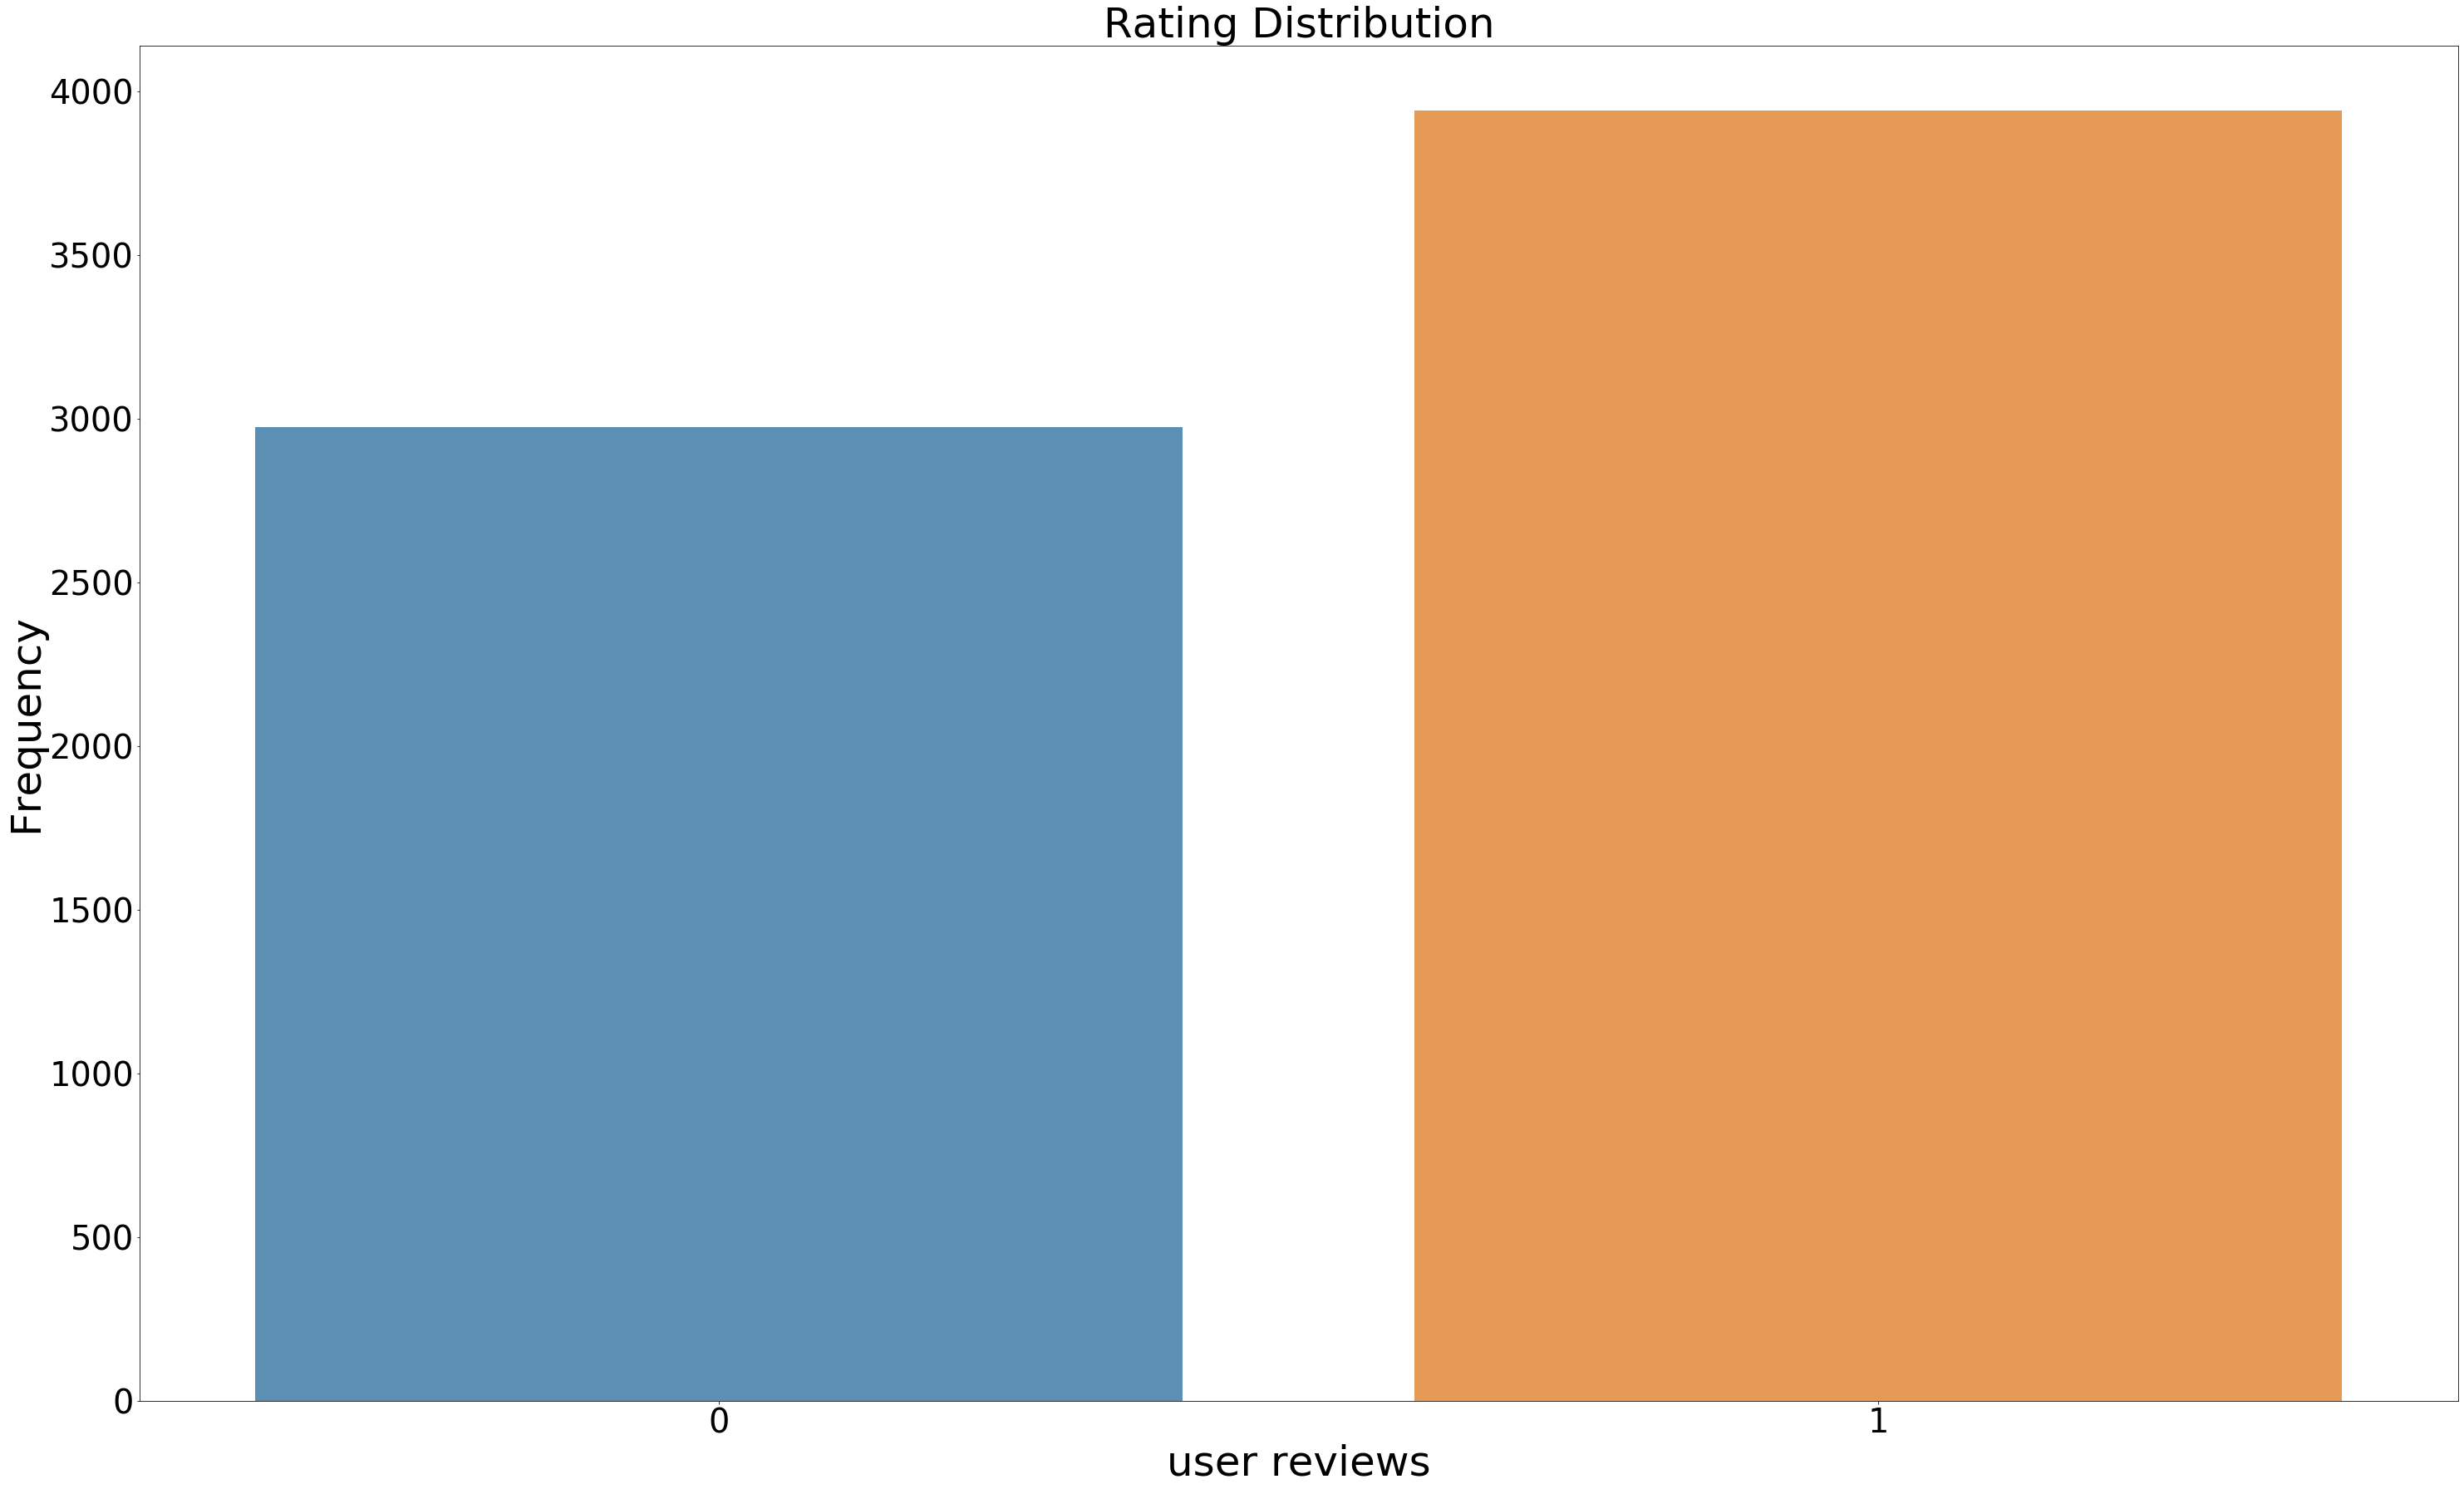

In [18]:
x=data.Reviews.value_counts()
y=x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x.index,x.values,alpha=0.8)
plt.title("Rating Distribution",fontsize=50)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('user reviews',fontsize=50)
plt.xticks(fontsize=40)

 <h2 style="color:lightcoral">Term Frequency Analysis</h2>

###### NLTK has a great library named “FreqDist” which allows us to determine the count of the most common terms in our corpus. First, we need to convert our individual lists of tokenized reviews into a comprehensive list of iterable tokens which stores all the reviews together. Finally, we pass FreqDist() the “allwords” object and apply the “most_common(100)” function to obtain the 100 most common words.

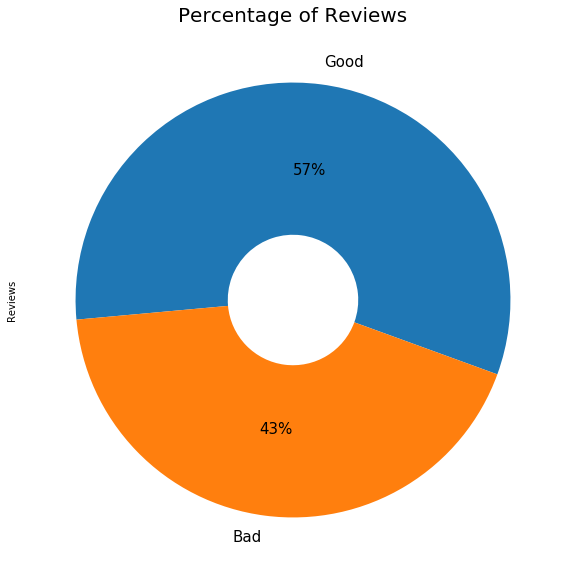

In [19]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Reviews', fontsize=20)
data.Reviews.value_counts().plot(kind='pie', labels=['Good', 'Bad'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [20]:
words = data['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['da', 'vinci', 'code', 'book', 'awesome', 'first', 'clive', 'cussler', "'ve", 'ever', 'read', 'even', 'book', 'like', 'relic', 'da', 'vinci', 'code', 'plausible', 'like', 'da', 'vinci', 'code', 'lot', 'like', 'da', 'vinci', 'code', 'lot', 'like', 'da', 'vinci', 'code', 'ultimatly', "n't", 'seem', 'hold', "'s", "'s", 'even', 'exaggeration', 'midnight', 'go', 'wal-mart', 'buy', 'da', 'vinci', 'code', 'amazing', 'course', 'love', 'da', 'vinci', 'code', 'want', 'something', 'well', 'different', '..', 'think', 'da', 'vinci', 'code', 'great', 'kite', 'runner', 'da', 'vinci', 'code', 'actually', 'good', 'movie', '...', 'think', 'da', 'vinci', 'code', 'pretty', 'good', 'book', 'da', 'vinci', 'code', 'one', 'beautiful', 'movie', 'ive', 'ever', 'see', 'da', 'vinci', 'code', 'amaze', 'book', 'get', 'wrong', 'turn', 'light', 'radio', 'enjoy', 'da', 'vinci', 'code', 'da', 'vinci', 'code', 'really', 'good', 'love', 'da', 'vinci', 'code', '...', 'love', 'da', 'vinci', 'code..', 'night', 'da', 'vinci

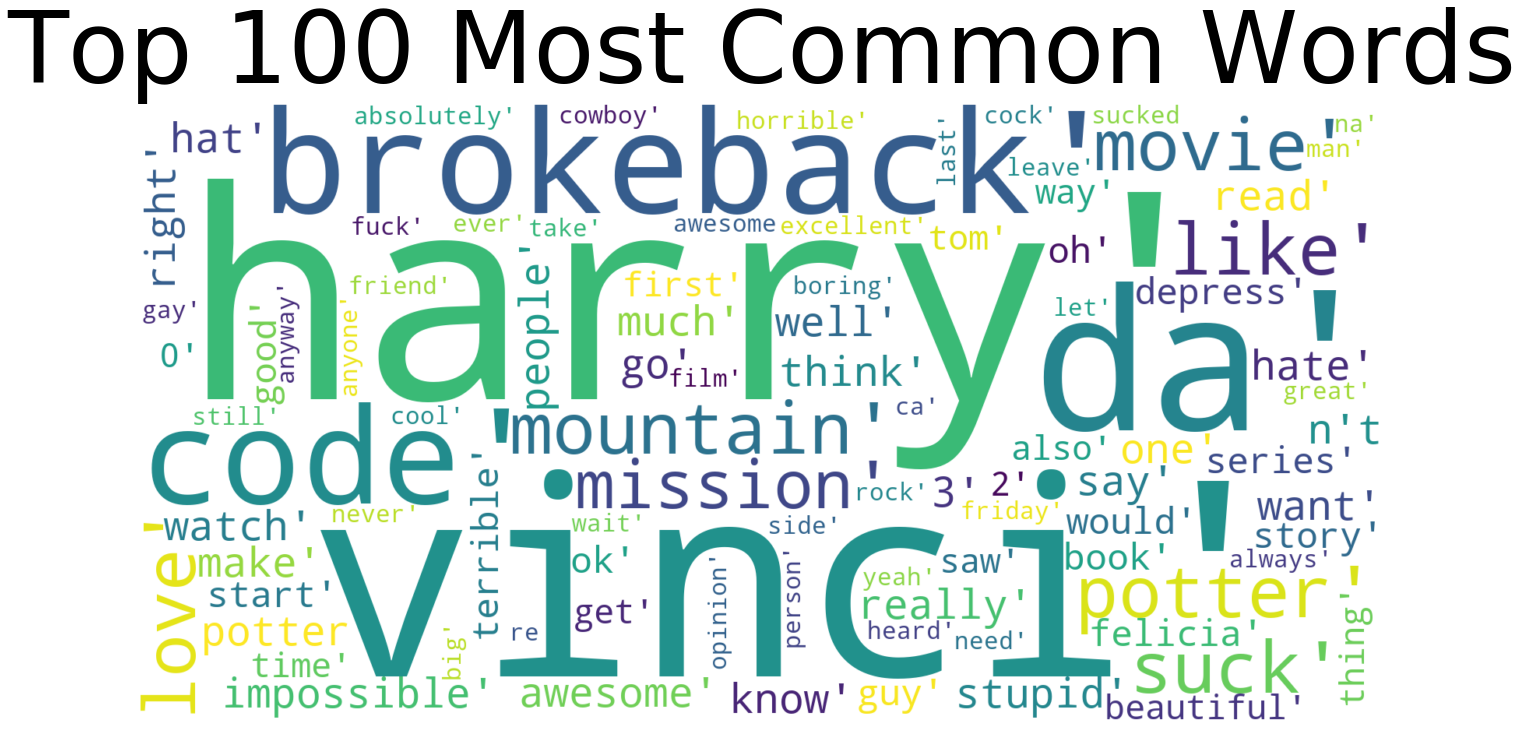

In [21]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

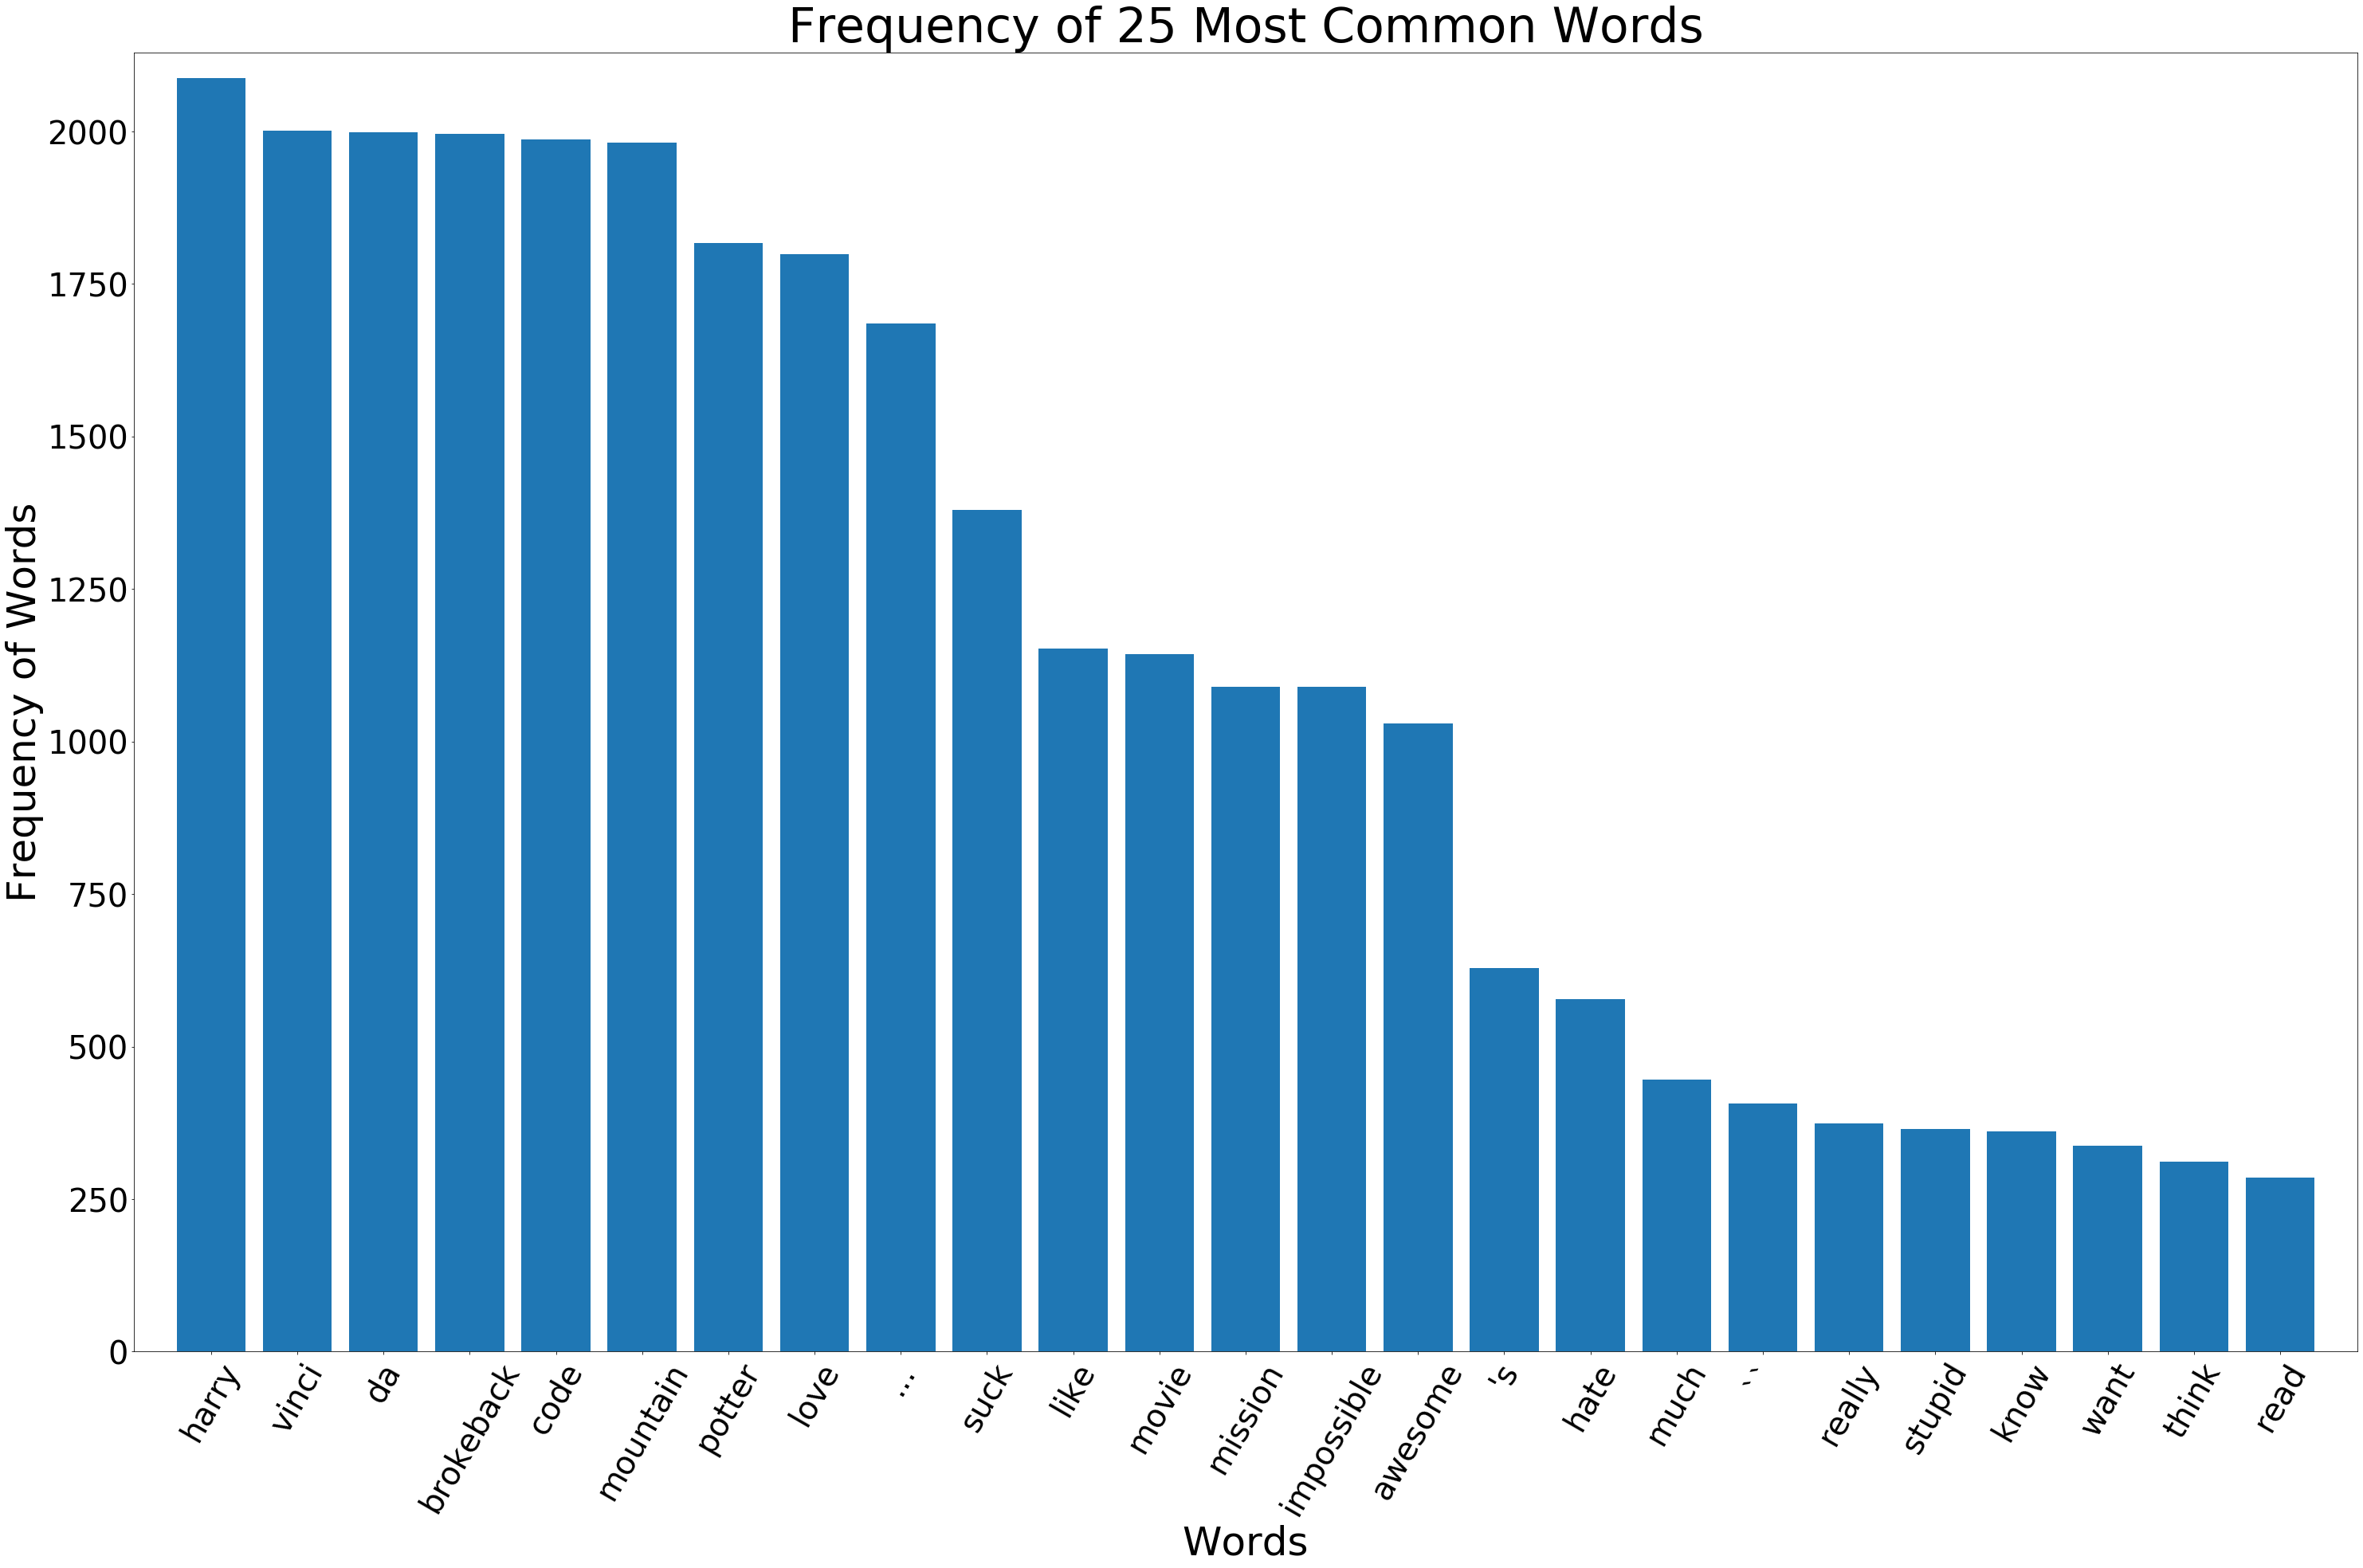

In [22]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [23]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [24]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [28]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
accuracy_score(y_test,clf.predict(X_test))*100
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))